# **Assignment 1 Biostatistics**

Spyridon Alvanakis Apostolou

AM: 7115152200020

In [8]:
#!pip install statsmodels --quiet

import numpy as np
from scipy import stats
from scipy.stats import chi2
from scipy.stats import wilcoxon
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from statsmodels.stats.diagnostic import lilliefors

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# **Exercise 1**

It is known that the average myocardial transit time in healthy individuals is 4.5sec. Myocardial transit time was measured in 10 patients with occluded right coronary arteries.

1) Test at the 5% significance level if the mean myocardial transit time of the population of patients with occluded right coronary arteries is equal to the value of 4.5sec. Present all steps of the test. Comment on whether the conclusions of the test are extended to all patients with occluded coronary arteries.
2) Test at the 5% significance level if the standard deviation of the myocardial transit time of the population of patients with occluded right coronary arteries is equal to 0.6 sec.

$$
\begin{array}{|c|c|c|c|c|c|c|c|c|c|c|}
\hline
\textbf{Patients} & A1 & A2 & A3 & A4 & A5 & A6 & A7 & A8 & A9 & A10 \\
\hline
\textbf{Time (sec)} & 5.1 & 5.6 & 4.6 & 3.8 & 4.2 & 5.1 & 3.1 & 3.7 & 4.7 & 3.3 \\
\hline
\end{array}
$$

## Question 1

In order to determine whether the mean myocardial transit time differs between healthy patients and those with occluded right coronary arteries, I will conduct a hypothesis test at the 5% significance level. However, the small sample size (n=10) necessitates additional checks, as normality cannot be assumed for such small samples. To address this, I will first use the Lilliefors test, a distribution-free normality test suitable for small sample sizes, to evaluate whether the occluded artery patient data appears normally distributed. If the data passes the normality test, I can proceed by identifying the sample's confidence intervals, and then I can determine whether the mean value of 4.5 falls within it. Otherwise, a non-parametric test may be more appropriate. Since the sample consists of only 10 patients with occluded arteries, the test results cannot be definitively extended to the broader population without further sampling. However, it will provide an initial statistical comparison of the mean transit time between these patients and the population of healthy patients. I will construct a 95% confidence interval around the occluded artery patient mean to obtain a range of plausible values for the population mean transit time. If this interval excludes 4.5 seconds, it will provide evidence to suggest the population means differ.

In [9]:
data = np.array([5.1, 5.6, 4.6, 3.8, 4.2, 5.1, 3.1, 3.7, 4.7, 3.3])
data

array([5.1, 5.6, 4.6, 3.8, 4.2, 5.1, 3.1, 3.7, 4.7, 3.3])

In [10]:
_, pvalue = lilliefors(data, dist = 'norm')
a = 0.05
if pvalue < a:
    print(f"The sample does NOT seem to follow a normal distribution (Reject H0)")
else:
    print(f"The sample seems to follow a normal distribution (Fail to Reject H0)")

The sample seems to follow a normal distribution (Fail to Reject H0)


**Steps when the population variance is unknown:** 
- Step 1 : We set the null hypothesis $H_0: \mu=4.5$.
- Step 2 : We set the alternative hypothesis $H_1: \mu \neq 4.5$ since the hypothesis is two-tailed.
- Step 3 : We set $t=\sqrt{n}\frac{\bar{x}-4.5}{s}$ (which follows the Student’s t distribution with n-1 degrees of freedom) where s is the sample standard deviation.
- Step 4 : We select the level of significance a and estimate the corresponding point $t_{a/2,n-1}$.
- Step 5 : We calculate the value of t for the sample.
- Step 6 : We reject the null hypothesis in favor of $H_1 : \mu \neq 4.5$  if $|t|>t_{a/2,n-1}$ (two-tailed hypothesis test).

In [11]:
a = 0.05
n = len(data)
x_bar = np.mean(data)
s = np.std(data, ddof=1)

In [12]:
t_val = (x_bar - 4.5) / (s / np.sqrt(n))
critical_t = stats.t.ppf(1 - a/2, df=n-1)

print(f"Calculated t-value: {t_val}")
print(f"Critical t-value: {critical_t}")


if abs(t_val) > critical_t:
    print("Reject the null hypothesis.")
    print("There is enough evidence at the 5% significance level to conclude that the mean myocardial transit time of patients with occluded right coronary arteries is different from 4.5 sec.")
else:
    print("Do not reject the null hypothesis.")
    print("There is not enough evidence at the 5% significance level to conclude that the mean myocardial transit time of patients with occluded right coronary arteries is different from 4.5 sec.")

Calculated t-value: -0.6816356439122179
Critical t-value: 2.2621571627409915
Do not reject the null hypothesis.
There is not enough evidence at the 5% significance level to conclude that the mean myocardial transit time of patients with occluded right coronary arteries is different from 4.5 sec.


In [13]:
margin_of_error = critical_t * (s / np.sqrt(n))
confidence_interval = (x_bar - margin_of_error, x_bar + margin_of_error)

print(f"95% confidence interval for the mean: {confidence_interval}")

95% confidence interval for the mean: (3.7226305799439445, 4.9173694200560565)


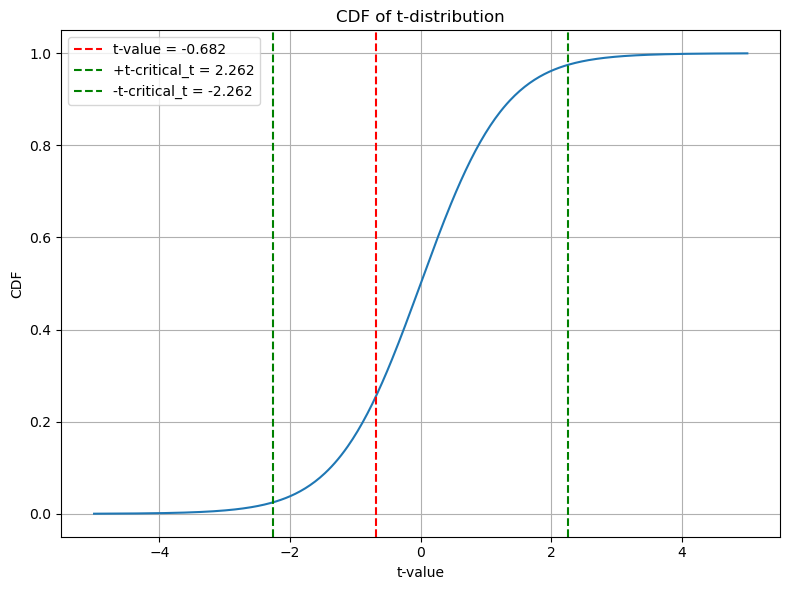

In [14]:
# Range of t-values
t_values = np.linspace(-5, 5, 400)

# CDF
cdf_values = stats.t.cdf(t_values, df=n-1)

plt.figure(figsize=(8,6))
plt.plot(t_values, cdf_values)
plt.axvline(t_val, color='red', linestyle='--', label=f"t-value = {t_val:.3f}")
plt.axvline(critical_t, color='green', linestyle='--', label=f"+t-critical_t = {critical_t:.3f}")
plt.axvline(-critical_t, color='green', linestyle='--', label=f"-t-critical_t = {-critical_t:.3f}")

plt.xlabel('t-value')
plt.ylabel('CDF')
plt.title('CDF of t-distribution')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

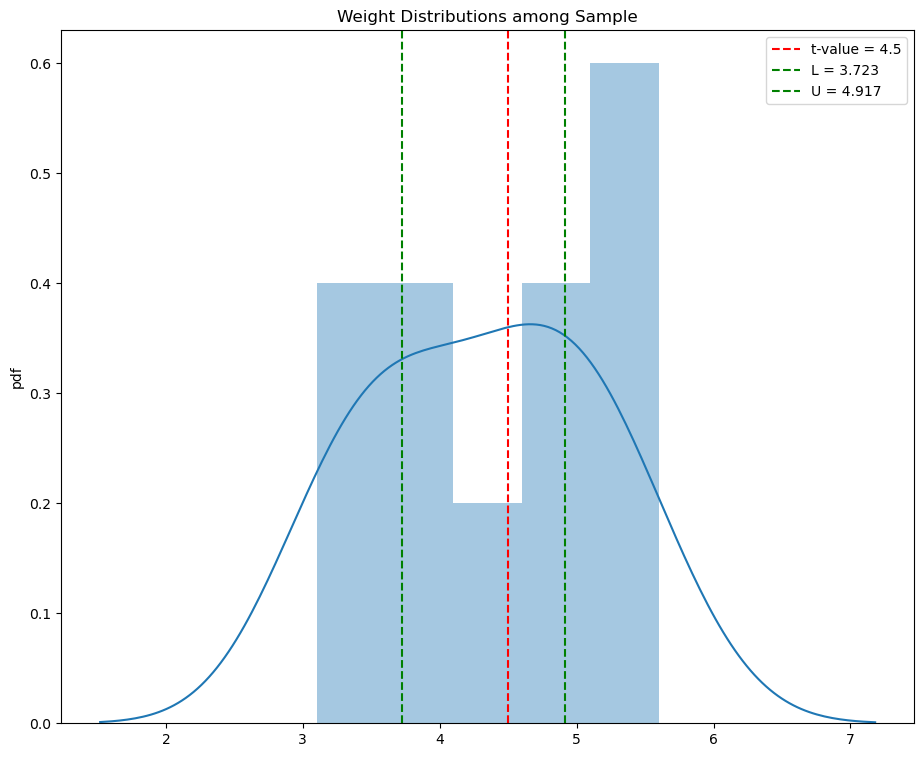

In [15]:
f, ax = plt.subplots( figsize = (11,9) )  
plt.title( 'Weight Distributions among Sample' )  
plt.ylabel( 'pdf' )  
sns.distplot( data, bins = 5)  
plt.axvline(4.5, color='red', linestyle='--', label=f"t-value = {4.5}")
plt.axvline(confidence_interval[0], color='green', linestyle='--', label=f"L = {confidence_interval[0]:.3f}")
plt.axvline(confidence_interval[1], color='green', linestyle='--', label=f"U = {confidence_interval[1]:.3f}")
plt.legend()
plt.show() 

## Question 2

The Lilliefors normality test on the sample of 10 patients fails to reject the null hypothesis of normality (p-value = 0.21). Therefore, we can proceed with a parametric test assuming normality.

To assess whether the population standard deviation differs from the hypothesized value of 0.6 seconds, I will use the chi-squared distribution percentages as confidence intervals. The null hypothesis is that the standard deviation equals 0.6. The alternative is that the standard deviation is not equal to 0.6.

**Steps for hypothesis Tests for the Variance**

- Step 1: We set the null hypothesis $H_0: \sigma = 0.6$.
- Step 2: We set the alternative hypothesis $H_1: \sigma \neq 0.6$ for the two tailed hypothesis.
- Step 3 : We set $\chi ^2=\frac{(n-1)S^2}{\sigma_0^2}$                 (which $\chi$ follows the chi-square distribution and $S^2$ is the samples variance).
- Step 4 : We select the significance level a and specify the points $\chi_{(n-1);a/2}^2$ and $\chi_{(n-1);1-a/2}^2$.
- Step 5 : We calculate the value of $\chi^2$ for the sample.
- Step 6 : We reject the null hypothesis in favor of $H_1: \sigma \neq 0.6$ if $\chi^2>\chi_{(n-1);a/2}^2$ or $\chi^2<\chi_{(n-1);1-a/2}^2$  (two-tailed test)

In [16]:
S_2 = np.var(data, ddof=1)
chi_squared_stat = (n-1) * S_2 / (0.6**2)

In [17]:
chi2_lower = chi2.ppf(a/2, df=n-1)
chi2_upper = chi2.ppf(1-a/2, df=n-1)

In [18]:
if chi_squared_stat < chi2_lower or chi_squared_stat > chi2_upper:
    print(f"Reject the null hypothesis at the {a*100}% significance level.")
    print(f"The observed chi-squared stat of {chi_squared_stat:.4f} is outside the interval ({chi2_lower:.4f}, {chi2_upper:.4f}).")
else:
    print(f"Do not reject the null hypothesis at the {a*100}% significance level.")
    print(f"The observed chi-squared stat of {chi_squared_stat:.4f} is inside the interval ({chi2_lower:.4f}, {chi2_upper:.4f}).")


Do not reject the null hypothesis at the 5.0% significance level.
The observed chi-squared stat of 17.4333 is inside the interval (2.7004, 19.0228).


# **Exercise 2**

A dentist’s patients listen to the FM1 radio station during dental treatment as she believes that this calms them down. The dentist conducted a large survey of her patients' stress levels, asking them to rate the level of stress they felt during their dental treatment on a scale of 1 to 10 ("1" being no stress and "10" in the case of excessive stress). The responses followed a non-normal but symmetric distribution with a median equal to 4. In order to improve the relaxation levels of her patients during dental treatment, the dentist changed the radio station FM1 to the radio station FM2. She asked 18 of her random patients to rate on a scale of 1 to 10 their stress levels during dental treatment while listening to the FM2 radio station. Test at the 10% level of significance whether the FM2 radio station changed the stress level of patients.

$$
\begin{array}{|c|c|c|c|c|c|c|}
\hline
\textbf{Patient} & 1 & 2 & 3 & 4 & 5 & 6 \\
\hline
\textbf{Rate} & 8 & 2 & 6 & 3 & 4 & 3 \\
\hline
\textbf{Patient} & 7 & 8 & 9 & 10 & 11 & 12 \\
\hline
\textbf{Rate} & 4 & 3 & 10 & 1 & 6 & 3 \\
\hline
\textbf{Patient} & 13 & 14 & 15 & 16 & 17 & 18 \\
\hline
\textbf{Rate} & 9 & 3 & 6 & 6 & 4 & 6 \\
\hline
\end{array}
$$

## Solution

Since the original stress level data is non-normal, discrete, and comes from a symmetric distribution with a median of 4, the nonparametric Wilcoxon signed-rank test is appropriate to compare the stress levels under FM2 to the original distribution. This is a paired difference test suitable for small sample sizes (n=18) where distributional assumptions cannot be made.

The hypotheses ot the Wilcoxon signed-rank test are:
- The null hypothesis $H_0$ states that the original median of 4 is identical to the median stress level with FM2.
- The alternative hypothesis $H_1$ is that the FM2 median does not equal 4.

I will conduct a two-tailed test at the 10% significance level.

The p-value is calculated based on the ranks of the differences between the FM2 scores and hypothesized median. If p < 0.1, the null hypothesis will be rejected, indicating a difference between the FM2 and original medians.

In [19]:
data = np.array([8, 2, 6, 3, 4, 3, 4, 3, 10, 1, 6, 3, 9, 3, 6, 6, 4, 6])
data

array([ 8,  2,  6,  3,  4,  3,  4,  3, 10,  1,  6,  3,  9,  3,  6,  6,  4,
        6])

In [20]:
a = 0.1
differences = data - 4

_, pvalue = wilcoxon(differences, alternative='two-sided')

if pvalue < a:
    print(f"Reject the null hypothesis. The p-value is {pvalue:.4f}")
else:
    print(f"Do not reject the null hypothesis. The p-value is {pvalue:.4f}")

Do not reject the null hypothesis. The p-value is 0.1594


The resulting p-value is 0.1594, indicating a failure to reject the null hypothesis. There is not sufficient evidence to conclude the FM2 median differs from the original at the 10% significance level.

Eventually the FM2 station does not appear to significantly impact patient stress levels compared to the original distribution based on this statistical test.

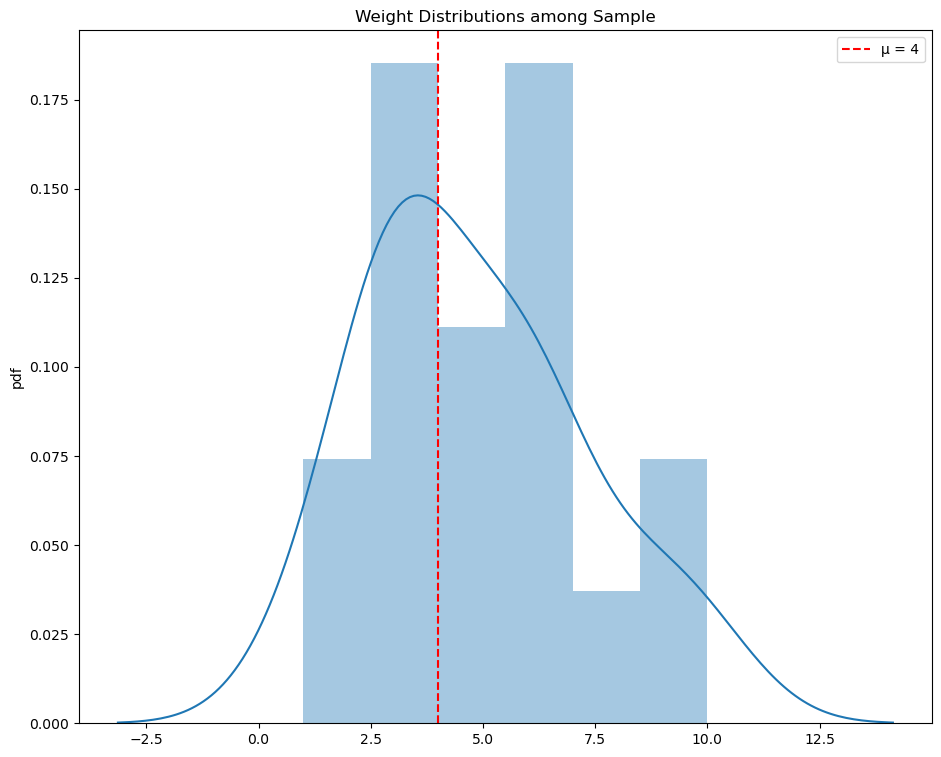

In [21]:
f, ax = plt.subplots( figsize = (11,9) )  
plt.title( 'Weight Distributions among Sample' )  
plt.ylabel( 'pdf' )  
sns.distplot( data, bins = 6)  
plt.axvline(4, color='red', linestyle='--', label=f"μ = {4}")
plt.legend()
plt.show() 

# **Exercise 3**

In order to assess the effectiveness of the vaccine against covid-19, a sample of 58 people who were vaccinated with the covid-19 vaccine and 49 people who were not vaccinated with the covid-19 vaccine were studied. Of the people vaccinated against covid-19, 16 got sick from covid-19 within 12 months from vaccination. Of the people who were not vaccinated, 39 got sick from covid-19 within 12 months from vaccination.
1) Examine whether there is a (statistically significant) relationship between vaccination against covid-19 and not getting sick from covid-19.
2) What is the maximum number of people in the sample of 58 people who were vaccinated that would be acceptable to get sick from covid-19 in order to conclude that there is a (statistically significant) relationship between vaccination against covid-19 and not getting sick from covid-19?

## Question 1

I will use the chi-squared test to determine whether there is a statistically significant relationship between receiving the covid-19 vaccine and not getting sick from it.

The chi-squared test compares the observed frequencies (categorical data) against the theoretically expected frequencies assuming that the null hypothesis is true. The null hypothesis states that the distributions of the populations under study are *No Different* from one another. It also makes the assumption that the observations are independent which in our case is true.

The chi-square test provides unreliable results when:
- The minimum theoretically expected value is smaller than 1. 
- More than the 20% of the theoretically expected frequencies are smaller than 5.
- We have less than 20 observations.
- In the case of 2x2 contingency tables with 20-40 observations, we have at least one of the theoretically expected values less than 5.

Our data do not meet any of the criteria listed above, so I can use the chi-squared test. 

The following table is the contingency table and contains the frequencies corresponding to any combination of the categories of the variables under study.

$$
\begin{array}{|c|c|c|c|}
\hline
& \textbf{Vaccinated} & \textbf{Not Vaccinated} & \textbf{Total row} \\
\hline
\textbf{Got Sick} & 16 & 39 & 55 \\
\hline
\textbf{Didn't Get Sick} & 42 & 10 & 52 \\
\hline
\textbf{Total column} & 58 & 49 & 107 \\
\hline
\end{array}
$$


**Steps of the chi-square test for independence:**
- Step 1 : We set the null hypothesis $H_0$: “There is no dependence between the variables under study”
- Step 2 : The alternative hypothesis $H_1$ is: “There is dependence between the variables under study”.
- Step 3 : We estimate the theoretically expected frequencies $E_i$ in accordance with the null hypothesis.
- Step 4 : We set $\chi^2 = \sum_{i=1}^{rc}\frac{(O_i-E_i)^2}{E_i}$ (which follows the chi-square distribution with $df=(c-1)(r-1)$ degrees of freedom), where Oi are the observed frequencies. 
- Step 5a : We calculate the value of $x_2$ and (from the chi-square cdf we calculate) the probability $P$ that corresponds to $x_2$.
- Step 5b : We select the significance level a (in our case is 5%).
- Step 6 : We reject the null hypothesis H0 in favor of $H_1$ if $P>1-a$.


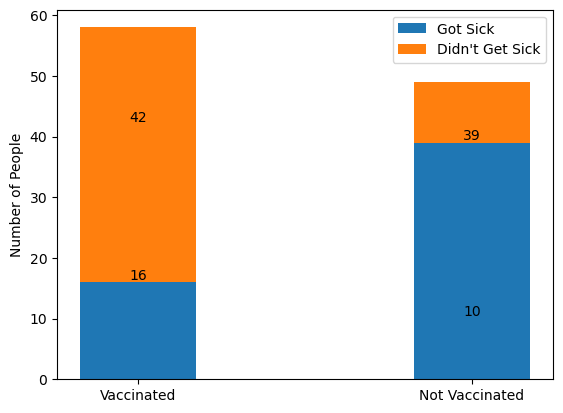

In [22]:
labels = ['Vaccinated', 'Not Vaccinated']
got_sick = [16, 39]
didnt_get_sick = [42, 10]

x = range(len(labels)) 
width = 0.35  

fig, ax = plt.subplots()

rects1 = ax.bar(x, got_sick, width, label='Got Sick')
rects2 = ax.bar(x, didnt_get_sick, width, bottom=got_sick, label="Didn't Get Sick")

ax.set_ylabel('Number of People')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()


In [23]:
data = np.array([got_sick, didnt_get_sick])
data

array([[16, 39],
       [42, 10]])

In [24]:
x_val, pvalue, _, _ = chi2_contingency(data)

if pvalue < 0.05:
    print(f"The relationship between vaccination and not getting sick is statistically significant with p-value {pvalue}")
else:
    print(f"There is no statistically significant relationship between vaccination and not getting sick. p-value = {pvalue}")

The relationship between vaccination and not getting sick is statistically significant with p-value 2.36058898681215e-07


Observed frequencies :

$$
\begin{array}{|c|c|c|c|}
\hline
& \textbf{Vaccinated} & \textbf{Not Vaccinated} & \textbf{Total row} \\
\hline
\textbf{Got Sick} & 16 & 39 & 55 \\
\hline
\textbf{Didn't Get Sick} & 42 & 10 & 52 \\
\hline
\textbf{Total column} & 58 & 49 & 107 \\
\hline
\end{array}
$$

Expected frequencies : 

$$
\begin{array}{|c|c|c|c|}
\hline
& \textbf{Vaccinated} & \textbf{Not Vaccinated} & \textbf{Total row} \\
\hline
\textbf{Got Sick} & 29.8=58*55/107 & 25.1=49*55/107 & 55 \\
\hline
\textbf{Didn't Get Sick} & 28.1=58*52/107 & 23.8=49*52/107 & 52 \\
\hline
\textbf{Total column} & 58 & 49 & 107 \\
\hline
\end{array}
$$

$\frac{(O-E)^2}{E} table:$

$$
\begin{array}{|c|c|c|}
\hline
& \textbf{Vaccinated} & \textbf{Not Vaccinated}  \\
\hline
\textbf{Got Sick} & 6.39 & 7.69  \\
\hline
\textbf{Didn't Get Sick} & 6.87 & 8  \\
\hline
\end{array}
$$

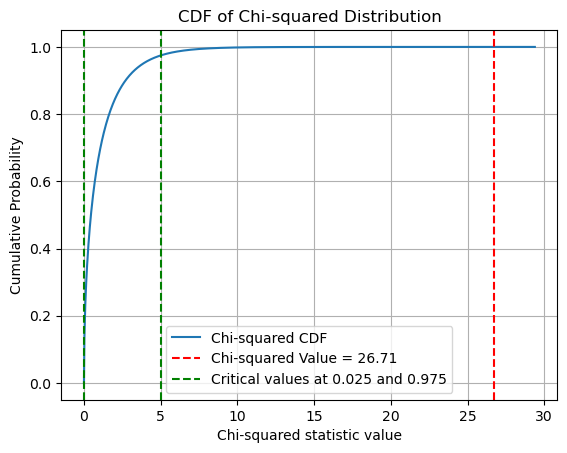

In [25]:
a = 0.05
crit_val = chi2.ppf(1 - a/2, df=(2-1)*(2-1)) # positive p value 

x = np.linspace(0, x_val*1.1, 1000) 
y = chi2.cdf(x, df=(2-1)*(2-1))

plt.plot(x, y, label="Chi-squared CDF")

plt.axvline(x=x_val, color='red', linestyle='--', label=f'Chi-squared Value = {x_val:.2f}')
plt.axvline(x=crit_val, color='green', linestyle='--')
plt.axvline(x=chi2.ppf(a/2, df=(2-1)*(2-1)), color='green', linestyle='--', label=f'Critical values at {a/2} and {1-a/2}')
plt.title('CDF of Chi-squared Distribution')
plt.xlabel('Chi-squared statistic value')
plt.ylabel('Cumulative Probability')
plt.legend()
plt.grid(True)
plt.show()


## Question 2

In the first part of the analysis, a chi-squared test for independence found a statistically significant association between COVID-19 vaccination status and sickness in the sample data (p<0.05). This suggests the vaccine provides protection against becoming sick.

To determine the robustness of this finding is, I will systematically alter the number of vaccinated individuals who became sick and re-run the chi-squared test. This will identify the maximum number that can become sick before the relationship loses statistical significance.

I will increase the sick vaccinated count from 16 up towards the total of 58, testing each possible cutoff value. When the p-value rises above 0.05, that indicates the evidence for an association between vaccination status and sickness is no longer significant at the 5% level.

With statistical significance of $\alpha=0.05$, the outputs are the minimum and maximum sick patients of the vaccinated counts. The conclusion is that as many individuals (in this sample) as possible might get a disease before statistical significance of the vaccine's safety is lost.

By iteratively testing all possible cutoff points, I can precisely determine the boundaries where the relationship flips from significant to non-significant based on the p-value criteria.

In [40]:
on_sign_aeria = "bellow"

for sick_vaccinated in range(16, 59):  
    data = [[sick_vaccinated, 39], [58 - sick_vaccinated, 10]]
    _, p, _, _ = chi2_contingency(data)
    if p < 0.05 and on_sign_aeria == "bellow":
        min_acceptable = sick_vaccinated
    elif p >= 0.05:
        max_acceptable = sick_vaccinated
        on_sign_aeria = "above"
    elif p < 0.05 and on_sign_aeria == "above":    
        break  

print(f"The maximum number of vaccinated people that can get sick  while still having a statistically significant relationship is {max_acceptable}. The minimum number is {min_acceptable + 1}")


The maximum number of vaccinated people that can get sick  while still having a statistically significant relationship is 54. The minimum number is 35


# **Exercise 4**

The treatment of a skin disease requires two drugs in combination, the drug A and another drug B. Drug B is chosen among three drugs B1, B2 and B3. A pharmaceutical company wanted to study the effect that A has with each of the three drugs B1, B2 and B3 in the treatment of this disease. For this purpose, the company selected 30 patients and randomly divided them into 3 groups of 10 patients each. In the first group, drugs A and B1 were administered in combination, in the second group, drugs A and B2 in combination and in the third group, drugs A and B3 in combination. Based on the symptomatology of the disease after the administration of the drugs, the company evaluated the effectiveness of each combination of drugs on a scale of 0 – 20 (0 corresponds to no symptoms). The results of the evaluation are shown in the following table:

$$
\begin{array}{|c|c|c|c|c|c|c|c|c|c|c|}
\hline
\textbf{Combination of Α and Β1} &12 &17 &12 &14 &14 &16 &18 &15 &11 &15 \\
\hline
\textbf{Combination of Α and Β2} &10 &13 &8 &8 &7 &16 &12 &8 &12 &13 \\
\hline
\textbf{Combination of Α and Β3} &11 &14 &12 &12 &16 &12 &15 &14 &11 &17\\
\hline
\end{array}
$$


1) Examine whether the effect of the drug combination depends on which drug B is used, at the 1% significance level. Which combination is the most effective?
2) Repeat question (a) at the 5% significance level.

## Question 1

To examine if there are differences in effectiveness between the three drug combinations A+B1, A+B2, and A+B3, I will perform a one-way ANOVA. This tests the null hypothesis that the population means are equal versus the alternative they are not all equal.

1) Independence - The random assignment of patients to groups ensures the observations are independent.
2) Normality - With sample sizes less than 30, the Lilliefors test is appropriate to assess normality. At the 5% significance level, none of the combinations show evidence of deviating from a normal distribution based on the Lilliefors p-values.
3) Homogeneity of Variance - Levene's test will be used to assess if the variance is equal between groups.

In this occasion the independancy comes from the randomeness of the selected patients. The normality and the equality of variances should be examined. 

In [27]:
A_B1 = np.array([12, 17, 12, 14, 14, 16, 18, 15, 11, 15])
A_B2 = np.array([10, 13, 8, 8, 7, 16, 12, 8, 12, 13])
A_B3 = np.array([11, 14, 12, 12, 16, 12, 15, 14, 11, 17])

In [28]:
statistic1, p_value1 = lilliefors(A_B1, dist = 'norm')
statistic2, p_value2 = lilliefors(A_B2, dist = 'norm')
statistic3, p_value3 = lilliefors(A_B3, dist = 'norm')

a = 0.05
for i, p in enumerate([p_value1, p_value2, p_value3], 1):
    if p < a:
        print(f"Combination A and B{i} does NOT seem to follow a normal distribution (Reject H0)")
    else:
        print(f"Combination A and B{i} seems to follow a normal distribution (Fail to Reject H0)")

Combination A and B1 seems to follow a normal distribution (Fail to Reject H0)
Combination A and B2 seems to follow a normal distribution (Fail to Reject H0)
Combination A and B3 seems to follow a normal distribution (Fail to Reject H0)


Since the normality assumption appears met, the F-test test can be used to test for equality of variances between each pair of groups.

In [29]:
def f_test(group1, group2):
   f = np.var(group1, ddof=1)/np.var(group2, ddof=1)
   nun = group1.size-1
   dun = group2.size-1
   p_value = 1-stats.f.cdf(f, nun, dun)
   return f, p_value

In [30]:
combinations = [(A_B1, A_B2), (A_B1, A_B3), (A_B2, A_B3)]
groups = ["(A_B1, A_B2)", "(A_B1, A_B3)", "(A_B2, A_B3)"]

temp = 0
for combo in combinations:
    f, pvalue = f_test(combo[0], combo[1])
    if pvalue < 0.05:
        print(f"The variances for the group {groups[temp]} are significantly different with p-value: {pvalue:.5f}")
    else:
        print(f"The variances for the group {groups[temp]} are not significantly different with p-value: {pvalue:.5f}")
    temp+=1

The variances for the group (A_B1, A_B2) are not significantly different with p-value: 0.77505
The variances for the group (A_B1, A_B3) are not significantly different with p-value: 0.41998
The variances for the group (A_B2, A_B3) are not significantly different with p-value: 0.17018


The large p-values indicates that the variances do not differ significantly between the comparisons.

Since the assumptions of the one-way anova are met:

In [31]:
# Perform one-way ANOVA
F, p = stats.f_oneway(A_B1, A_B2, A_B3)

print(f"F-statistic: {F:.3f}")
print(f"P-value: {p:.4f}")

F-statistic: 5.998
P-value: 0.0070


In [32]:
if p < 0.01:
    print("Reject the null hypothesis at the 1% significance level. There is a statistically significant difference between the groups.")
else:
    print("Fail to reject the null hypothesis at the 1% significance level. There is no statistically significant difference between the groups.")

Reject the null hypothesis at the 1% significance level. There is a statistically significant difference between the groups.


So the null hypothesis that the means are equal is rejected. In order to find the smallest mean:

In [33]:
mean_A_B1 = np.mean(A_B1)
mean_A_B2 = np.mean(A_B2)
mean_A_B3 = np.mean(A_B3)

print(f"Mean of A_B1: {mean_A_B1:.3f}")
print(f"Mean of A_B2: {mean_A_B2:.3f}")
print(f"Mean of A_B3: {mean_A_B3:.3f}")

smallest_mean_group = "A_B1" if mean_A_B1 < mean_A_B2 and mean_A_B1 < mean_A_B3 else ("A_B2" if mean_A_B2 < mean_A_B3 else "A_B3")
print(f"The population with the smallest mean is: {smallest_mean_group}")


Mean of A_B1: 14.400
Mean of A_B2: 10.700
Mean of A_B3: 13.400
The population with the smallest mean is: A_B2


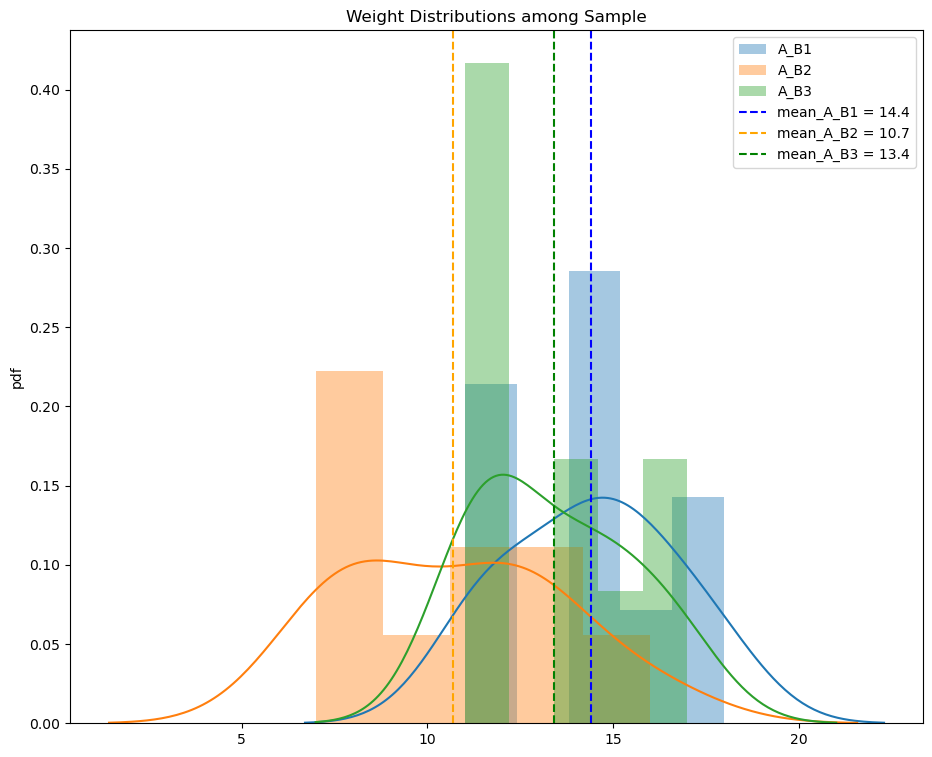

In [34]:
f, ax = plt.subplots( figsize = (11,9) )  
plt.title( 'Weight Distributions among Sample' )  
plt.ylabel( 'pdf' )  
sns.distplot( A_B1, bins = 5, label = "A_B1")  
sns.distplot( A_B2, bins = 5, label = "A_B2")  
sns.distplot( A_B3, bins = 5, label = "A_B3")  
plt.axvline(mean_A_B1, color= "blue", linestyle='--', label=f"mean_A_B1 = {mean_A_B1}")
plt.axvline(mean_A_B2, color= "orange", linestyle='--', label=f"mean_A_B2 = {mean_A_B2}")
plt.axvline(mean_A_B3, color= "green", linestyle='--', label=f"mean_A_B3 = {mean_A_B3}")
plt.legend()
plt.show() 

## Question 2

The F-statistic of 5.998 and p-value of 0.0070 are unchanged. At the 5% significance level, the p-value is still below the threshold of 0.05.

Therefore, we again reject the null hypothesis and conclude there is significant evidence that differences in effectiveness exist between the drug combinations based on this sample data.

In [35]:
if p < 0.05:
    print("Reject the null hypothesis at the 5% significance level. There is a statistically significant difference between the groups.")
else:
    print("Fail to reject the null hypothesis at the 5% significance level. There is no statistically significant difference between the groups.")


Reject the null hypothesis at the 5% significance level. There is a statistically significant difference between the groups.


# **Exercise 5**

Fourteen men participated in a study on the effect of red wine on polyphenol levels. The participants consumed two glasses of red wine daily for six months. The measurements of the polyphenol levels of the participants before starting to drink red wine and at the end of the semester are recorded in the following table:

$$
\begin{array}{|c|c|c|}
\hline
\textbf{Participants} & \textbf{Polyphenol levels before red wine consumption} & \textbf{Polyphenol levels after six months of red wine consumption} \\
\hline
P1 & 136 & 121 \\
\hline
P2 & 125 & 120 \\
\hline
P3 & 114 & 119 \\
\hline
P4 & 97 & 95 \\
\hline
P5 & 122 & 117 \\
\hline
P6 & 118 & 109 \\
\hline
P7 & 117 & 117 \\
\hline
P8 & 127 & 118 \\
\hline
P9 & 116 & 108 \\
\hline
P10 & 124 & 116 \\
\hline
P11 & 110 & 105 \\
\hline
P12 & 128 & 119 \\
\hline
P13 & 118 & 110 \\
\hline
P14 & 101 & 107 \\
\hline
\end{array}
$$

Examine whether red wine consumption decreases polyphenol levels in men at:
1) 10% significance level.
2) 5% significance level.

Comment on the results for the two different significance levels.

## Question 1

With a sample size of 14 men, which is less than 30, the central limit theorem cannot be relied upon to assume normality. Since we have paired measurements before and after wine consumption for the same participants, this suggests using a paired difference test. The small sample size means non-parametric tests should be considered, as normality cannot be assumed. I will test for normality to determine whether a parametric or non-parametric paired test is appropriate. The null hypothesis is that there is no difference in the population mean polyphenol levels before and after red wine consumption. The alternative is that the mean polyphenol levels decrease after consumption.

In [36]:
before = np.array([136, 125, 114, 97, 122, 118, 117, 127, 116, 124, 110, 128, 118, 101])
after = np.array([121, 120, 119, 95, 117, 109, 117, 118, 108, 116, 105, 119, 110, 107])

In [37]:
_, p_value1 = lilliefors(before, dist='norm')
_, p_value2 = lilliefors(after, dist='norm')

a = 0.05
populations = ["Before", "After"]

for i, (p, pop_name) in enumerate(zip([p_value1, p_value2], populations)):
    if p < a:
        print(f"{pop_name} population does NOT seem to follow a normal distribution (Reject H0).")
    else:
        print(f"{pop_name} population seems to follow a normal distribution (Fail to Reject H0).")

Before population seems to follow a normal distribution (Fail to Reject H0).
After population does NOT seem to follow a normal distribution (Reject H0).


The Lilliefors test indicates the "before" polyphenol levels appear normally distributed while the "after" levels deviate significantly from normality. Since the "after" population distribution is non-normal, I will use the nonparametric Wilcoxon signed-rank test for paired data. This does not assume an underlying normal distribution.

In [38]:
_, p = wilcoxon(before, after, alternative='greater')  # 'greater' tests if the values of `before` are greater than `after`

alpha = 0.1
print(p)
if p < alpha:
    print("Reject the null hypothesis. There's evidence at the 10% significance level to suggest red wine consumption decreases polyphenol levels in men.")
else:
    print("Fail to reject the null hypothesis. There's not enough evidence at the 10% significance level to suggest red wine consumption decreases polyphenol levels in men.")

0.005706018193000826
Reject the null hypothesis. There's evidence at the 10% significance level to suggest red wine consumption decreases polyphenol levels in men.


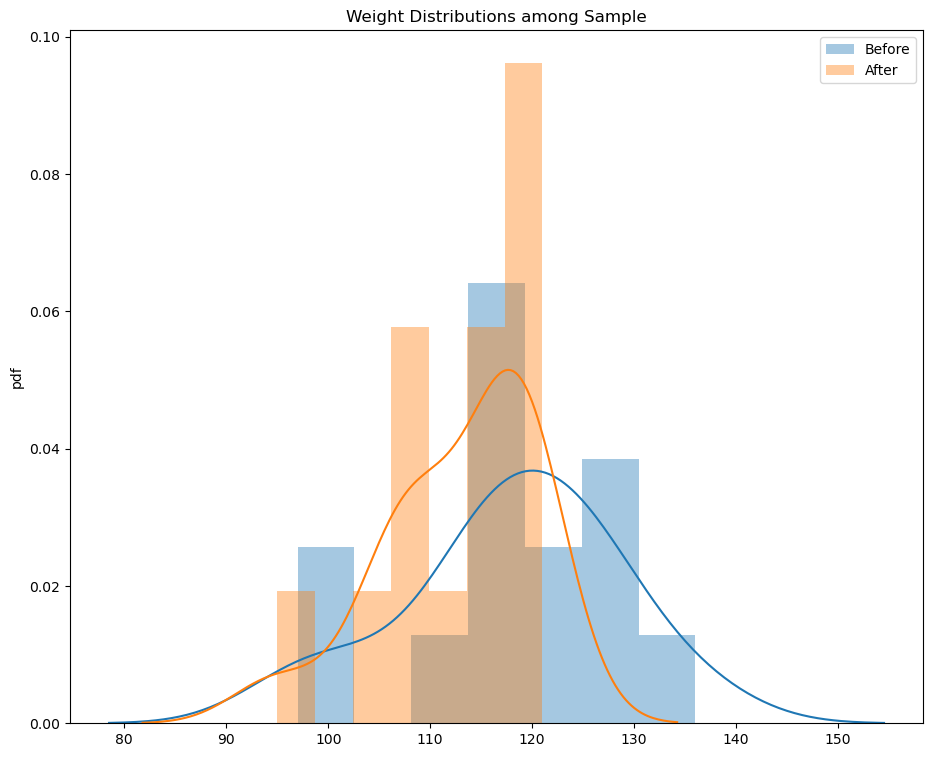

In [39]:
f, ax = plt.subplots( figsize = (11,9) )  
plt.title( 'Weight Distributions among Sample' )  
plt.ylabel( 'pdf' )  
sns.distplot( before, bins = 7, label = "Before")  
sns.distplot( after, bins = 7, label = "After")  
plt.legend()
plt.show() 

## Question 2

At a 5% significance level, the resulting p-value is 0.005706. Since this is below 0.05, the null hypothesis is still rejected. Therefore, even at the more stringent 5% significance level, there is statistically significant evidence that red wine consumption decreases polyphenol levels based on this sample data.